In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


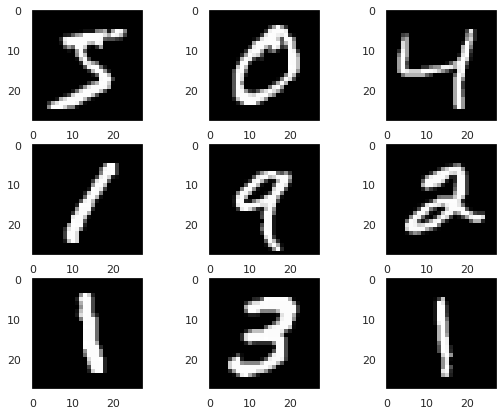

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.grid(False)
  # plt.axis('off')

In [ ]:
from sklearn.preprocessing import normalize
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# reshaping into 2d array
X_train_r = X_train.reshape(X_train.shape[0],28*28)
X_test_r = X_test.reshape(X_test.shape[0],28*28)
X_valid_r = X_valid.reshape(X_valid.shape[0],28*28)
# normalising
X_train_r = normalize(X_train_r)
X_valid_r = normalize(X_valid_r)
X_test_r = normalize(X_test_r)


In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(48000,)
(10000,)
(12000,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
kVals = range(1, 30, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 30, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(X_train_r, y_train)

	# evaluate the model and update the accuracies list
	score = model.score(X_valid_r, y_valid)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)

# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))

k=1, accuracy=97.61%
k=3, accuracy=97.70%
k=5, accuracy=97.67%
k=7, accuracy=97.53%
k=9, accuracy=97.39%
k=11, accuracy=97.21%
k=13, accuracy=97.09%
k=15, accuracy=96.97%
k=17, accuracy=96.81%
k=19, accuracy=96.71%
k=21, accuracy=96.59%
k=23, accuracy=96.58%
k=25, accuracy=96.47%
k=27, accuracy=96.38%
k=29, accuracy=96.20%
k=3 achieved highest accuracy of 97.70% on validation data


In [ ]:
accuracies = [acc*100 for acc in accuracies ]

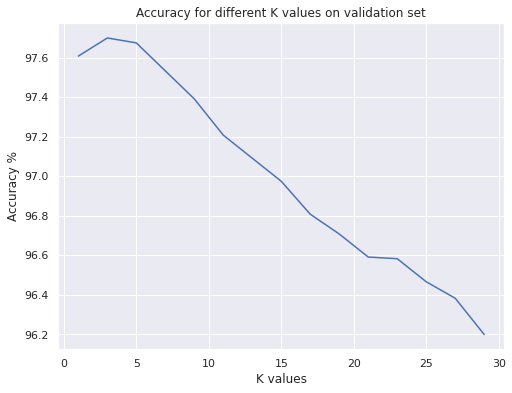

In [ ]:
sns.set(rc={'figure.figsize':(8, 6)})
fig = sns.lineplot(y=accuracies, x=kVals)
_ =fig.set_ylabel("Accuracy %")
_ = fig.set_xlabel("K values")
_ = fig.set_title("Accuracy for different K values on validation set")

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_r, y_train)
predictions = model.predict(X_test_r)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.99      0.97      0.98      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.95      0.96       892
           6       0.98      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



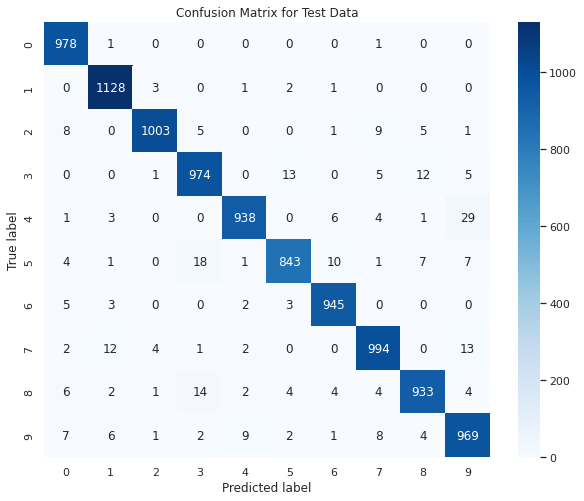

In [ ]:
cm = confusion_matrix(y_test, predictions)
sns.set(rc={'figure.figsize':(10, 8)})
cm = sns.heatmap(cm, annot=True, cmap='Blues',  fmt='g')

_ = cm.set_ylabel('True label')
_ = cm.set_xlabel('Predicted label')
_ = cm.set_title("Confusion Matrix for Test Data")

In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 1)
scores = cross_val_score(knn, X_train_r, y_train, cv=5, scoring='accuracy')

In [ ]:
scores

array([0.96760417, 0.96916667, 0.97052083, 0.96729167, 0.96927083])

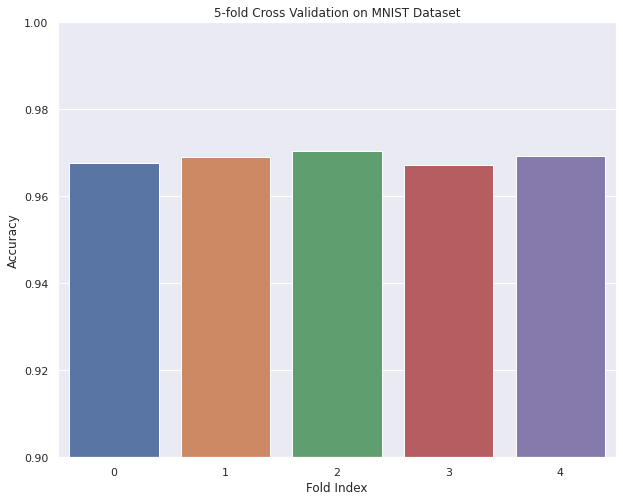

In [ ]:
sns.set()

bar = sns.barplot(x=np.array([0,1,2,3,4]),y=scores)
bar.set_ylim([0.9,1])
bar.set_title("5-fold Cross Validation on MNIST Dataset")
bar.set_ylabel("Accuracy")
_= bar.set_xlabel("Fold Index")